In [1]:
import numpy as np
import copy

from src.m02_best_from_finite_models import Get_P_V_single_timestep, Mask_x0_x1, Normalize_the_Lambdas, Reward, Plot_V

### 1 Define the world

In [2]:
dim0, dim1 = 3, 4

impenetrable_points = \
    [(-1,   d1  ) for d1 in range(dim1)] + \
    [(dim0, d1  ) for d1 in range(dim1)] + \
    [(d0  , -1  ) for d0 in range(dim0)] + \
    [(d0  , dim1) for d0 in range(dim0)] + \
    [(1,1)]

M = np.array([ [Mask_x0_x1(x=(x0,x1), D=impenetrable_points) for x1 in range(dim1)] for x0 in range(dim0) ])

R = np.array([  [Reward(x=(x0,x1)) for x1 in range(dim1)] for x0 in range(dim0) ])

### 2 No noise

In [3]:
hyperparameters = {
    'ep_noise':        0,
    'gam':             0.95
    }

V_0 = np.zeros((dim0, dim1))
Lam_candidates = np.array([[np.identity(5)[[0,2,3,4],:] for d1 in range(dim1)] for d0 in range(dim0)])


# Normalize_the_Lambdas
for d0 in range(dim0):
    for d1 in range(dim1):
        for d2 in range(Lam_candidates.shape[2]):
            Lam_candidates[d0,d1,d2] = Normalize_the_Lambdas(lam=Lam_candidates[d0,d1,d2], M=M[d0,d1], ep_noise=hyperparameters['ep_noise'])
            
            
# Iterative algorithm
V_new = V_0

for t in range(4,-1,-1):
    
    V = copy.deepcopy(V_new)
    Lam_new, V_new = Get_P_V_single_timestep(\
                        dimensions=(dim0, dim1), \
                        hyperparameters=hyperparameters, \
                        V=V, R=R, M=M, Lam_candidates=Lam_candidates)

In [4]:
np.around(V_new, 2)

array([[2.57, 3.52, 4.52, 4.52],
       [1.67, 0.  , 3.52, 4.52],
       [0.81, 1.67, 2.57, 1.67]])

In [5]:
probabilities = np.around(Lam_new**2 + M*hyperparameters['ep_noise'],2)
probabilities

array([[[0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.]]])

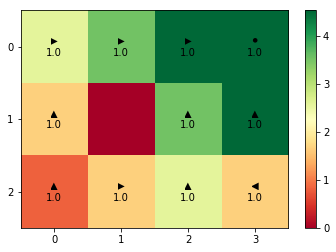

In [6]:
Plot_V(V_new, probabilities, impenetrable_points)

### 3 Add noise

In [7]:
hyperparameters = {
    'ep_noise':        0.04,
    'gam':             0.95
    }

V_0 = np.zeros((dim0, dim1))
Lam_candidates = np.array([[np.identity(5)[[0,2,3,4],:] for d1 in range(dim1)] for d0 in range(dim0)])


# Normalize_the_Lambdas
for d0 in range(dim0):
    for d1 in range(dim1):
        for d2 in range(Lam_candidates.shape[2]):
            Lam_candidates[d0,d1,d2] = Normalize_the_Lambdas(lam=Lam_candidates[d0,d1,d2], M=M[d0,d1], ep_noise=hyperparameters['ep_noise'])
            
            
# Iterative algorithm
V_new = V_0

for t in range(4,-1,-1):
    
    V = copy.deepcopy(V_new)
    Lam_new, V_new = Get_P_V_single_timestep(\
                        dimensions=(dim0, dim1), \
                        hyperparameters=hyperparameters, \
                        V=V, R=R, M=M, Lam_candidates=Lam_candidates)

In [8]:
np.around(V_new, 2)

array([[1.79, 2.55, 3.36, 3.26],
       [1.07, 0.  , 2.32, 3.09],
       [0.53, 0.85, 1.52, 0.74]])

In [9]:
probabilities = np.around(Lam_new**2 + M*hyperparameters['ep_noise'],2)
probabilities

array([[[0.  , 0.04, 0.92, 0.  , 0.04],
        [0.  , 0.  , 0.92, 0.04, 0.04],
        [0.  , 0.04, 0.88, 0.04, 0.04],
        [0.  , 0.04, 0.  , 0.04, 0.92]],

       [[0.92, 0.04, 0.  , 0.  , 0.04],
        [0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.88, 0.04, 0.04, 0.  , 0.04],
        [0.88, 0.04, 0.  , 0.04, 0.04]],

       [[0.92, 0.  , 0.04, 0.  , 0.04],
        [0.  , 0.  , 0.92, 0.04, 0.04],
        [0.88, 0.  , 0.04, 0.04, 0.04],
        [0.04, 0.  , 0.  , 0.92, 0.04]]])

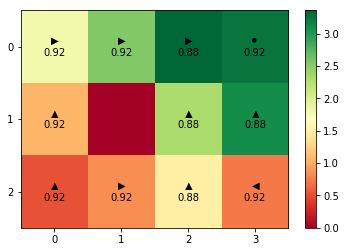

In [10]:
Plot_V(V_new, probabilities, impenetrable_points)